# **RESTUARANT RATING PREDICTION**

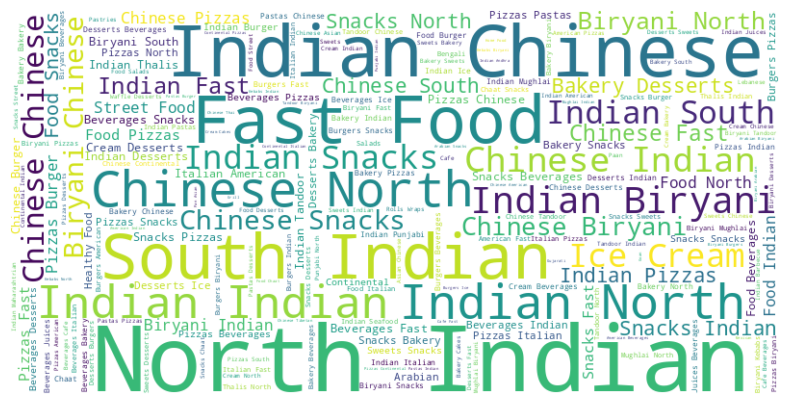

#**DATA DESCRIPTION**
### The dataset provided to us contains 9551 rows, and 19 different independent features. We aim to predict the rating of restuarants. This is clearly a Regression probelm and we will train the Regression models to predict the desired outputs. Mentioned below are the details of the features provided to us, which we will be feeding to our model to train it.

1. **RestaurantID**: Unique identifier for each restaurant.
2. **RestaurantName**: The name of the restaurant.
3. **CountryCode**: Country code where the restaurant is located.
4. **City**: The city where the restaurant is located.
5. **Address**: The specific address of the restaurant.
6. **Locality**: Locality or district within the city.
7. **LocalityVerbose**: A more detailed description of the locality.
8. **Longitude**: Longitude coordinate of the restaurant's location.
9. **Latitude**: Latitude coordinate of the restaurant's location.
10. **Cuisines**: Types of cuisines served at the restaurant.
11. **Currency**: Currency used in pricing.
12. **Has_Table_booking**: Indicates whether the restaurant offers table booking (Yes/No).
13. **Has_Online_delivery**: Indicates whether the restaurant offers online delivery (Yes/No).
14. **Is_delivering_now**: Indicates whether the restaurant is currently delivering orders (Yes/No).
15. **Switch_to_order_menu**: Indicates whether there's an option to switch to the ordering menu (Yes/No).
16. **Price_range**: Range indicating the price level of the restaurant.
17. **Votes**: Number of votes or reviews received by the restaurant.
18. **Average_Cost_for_two**: Average cost for two people to dine at the restaurant.
19. **Rating**: Rating of the restaurant.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('/content/ZomatoData.csv',encoding='latin-1')
df.head().style.background_gradient(cmap='Set3')

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.800000
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.500000
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.400000
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.900000
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.800000


In [ ]:
df.shape

(9551, 19)

In [ ]:
df.columns

Index(['RestaurantID', 'RestaurantName', 'CountryCode', 'City', 'Address',
       'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes',
       'Average_Cost_for_two', 'Rating'],
      dtype='object')

In [ ]:
df.dtypes

RestaurantID              int64
RestaurantName           object
CountryCode               int64
City                     object
Address                  object
Locality                 object
LocalityVerbose          object
Longitude               float64
Latitude                float64
Cuisines                 object
Currency                 object
Has_Table_booking        object
Has_Online_delivery      object
Is_delivering_now        object
Switch_to_order_menu     object
Price_range               int64
Votes                     int64
Average_Cost_for_two      int64
Rating                  float64
dtype: object

# **Defining the problem statement**

## **Create a predictive model which can predict the future Rating of a Restuarant**

*   Target variable: **Rating**
*   predictors: location,menu cost,etc



*   Rating = 1 (worst)
*   Rating = 5 (Best)

## Based on the problem statement its clear that we have to create **SUPERVISED MACHINE LEARNING REGRESSION MODEL** as the target variable is continuos





In [ ]:
#to determine unique values
for i in df.columns:
  print(i,":\n",df[i].unique())

RestaurantID :
 [6317637 6304287 6300002 ... 5915807 5916112 5927402]
RestaurantName :
 ['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
CountryCode :
 [162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]
City :
 ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensaco

In [ ]:
#check duplicate values in dataset
df.duplicated().sum()

0

No duplicate values present

##**Looking at the distribution of Target variable**

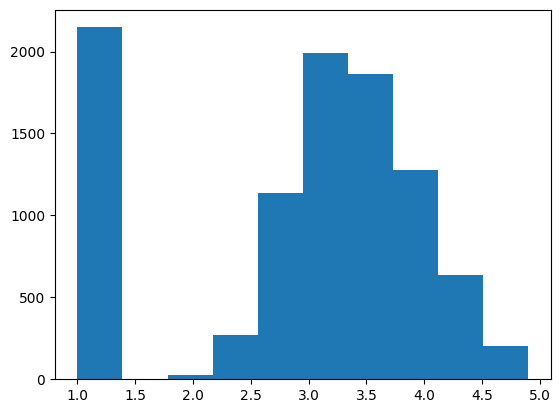

In [ ]:
#creating bar chart as the target variable is continious
plt.hist(df['Rating'])
plt.show()

###The bell curve reveals typical ratings, suggesting a central value for future predictions


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RestaurantID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
CountryCode,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Price_range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04
Average_Cost_for_two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Rating,9551.0,2.891268e+00,1.128845e+00,1.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00


In [ ]:
df.isna().sum()

RestaurantID            0
RestaurantName          0
CountryCode             0
City                    0
Address                 0
Locality                0
LocalityVerbose         0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
dtype: int64



* **nunique()**: This help to identify if a column is categorical or continious



In [ ]:
df.nunique()

RestaurantID            9551
RestaurantName          7446
CountryCode               15
City                     141
Address                 8918
Locality                1208
LocalityVerbose         1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Switch_to_order_menu       1
Price_range                4
Votes                   1012
Average_Cost_for_two     140
Rating                    33
dtype: int64

# **FEATURE ENGINEERING**

## In this data the 'cuisines' column cannot be used directly because it will generate 1825 dummy variables.Hence,we can count the number of cuisines ,which can be number,hence it can be used in ML  

In [ ]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [ ]:
#count the number of cuisines
df['Cuisines_Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))
df.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Cuisines_Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


##**Removing unwanted columns from the data**

In [ ]:
# #deleting those columns which are not useful for our predictive analysis
# rem_clms=['RestaurantID','RestaurantName','City','Address','Locality','LocalityVerbose']
# df.drop(columns=rem_clms,axis=1,inplace=True)
# df.head()

# **EXPLORATORY DATA ANALYSIS**


* ## Categorical variable : Bar plot , Pie plot
* ## Contnious variable : Histogam



In [ ]:
#collect categorical columns
categorical_clm =[]
for i in df.columns:
  if df[i].dtype=='object':
    categorical_clm.append(i)
categorical_clm

['RestaurantName',
 'City',
 'Address',
 'Locality',
 'LocalityVerbose',
 'Cuisines',
 'Currency',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Switch_to_order_menu']

In [ ]:
#currency based analysis
df['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [ ]:
#Has_Table_booking based analysis
df['Has_Table_booking'].value_counts()

Has_Table_booking
No     8393
Yes    1158
Name: count, dtype: int64

In [ ]:
#Has_Online_delivery based analysis
df['Has_Online_delivery'].value_counts()

Has_Online_delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [ ]:
#Is_delivering_now based analysis
df['Is_delivering_now'].value_counts()

Is_delivering_now
No     9517
Yes      34
Name: count, dtype: int64

In [ ]:
#Switch_to_order_menu based analysis
df['Switch_to_order_menu'].value_counts()

Switch_to_order_menu
No    9551
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 140 (\x8c) missing from current font.



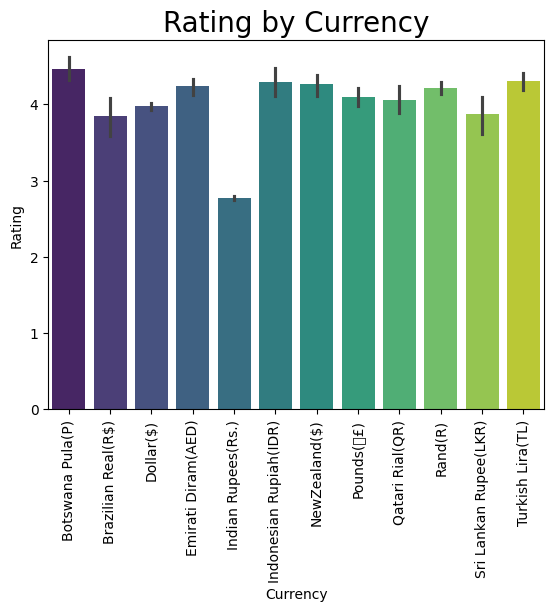

In [ ]:
# plot the bar chart of currency based on rating
sns.barplot(x='Currency',y='Rating',data=df,hue='Currency',palette='viridis')
plt.xticks(rotation=90)
plt.title('Rating by Currency',fontsize=20)
plt.show()


The distribution of various currencies are  not comparable to the rating

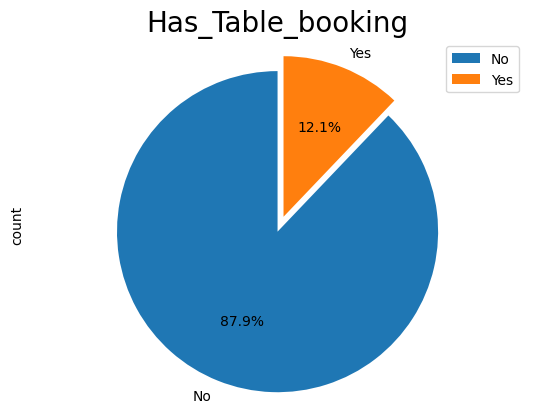

In [ ]:
#pie chart for Has_Table_booking
explode = (0.1, 0)
df['Has_Table_booking'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=explode)
plt.title('Has_Table_booking',fontsize=20)
plt.axis('equal')
plt.legend(labels=df['Has_Table_booking'].value_counts().index,loc='upper right')
plt.show()


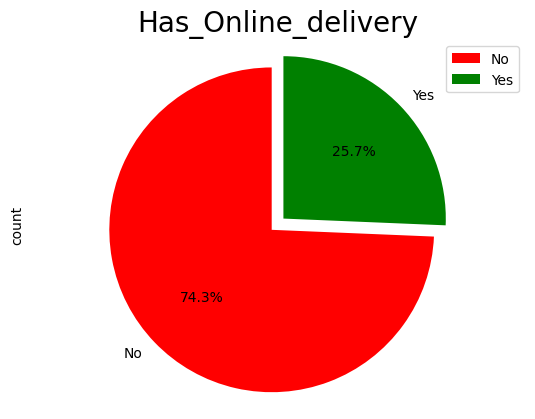

In [ ]:
#pie  chart for Has_Online_delivery
explode = (0.1, 0)
df['Has_Online_delivery'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['red', 'green'],explode=explode)
plt.title('Has_Online_delivery',fontsize=20)
plt.axis('equal')
plt.legend(labels=df['Has_Online_delivery'].value_counts().index,loc='upper right')
plt.show()


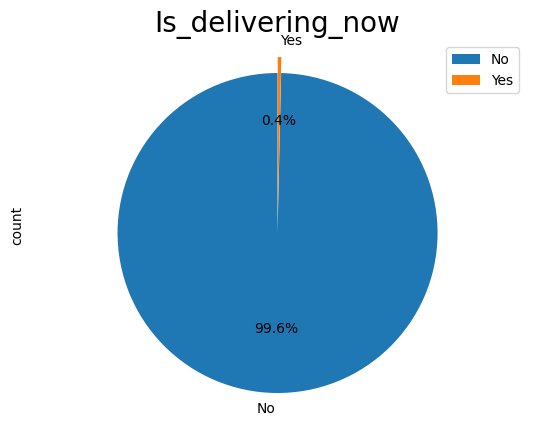

In [ ]:
#pie chart Representation for Is_delivering_now
explode = (0.1, 0)
df['Is_delivering_now'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=explode)
plt.title('Is_delivering_now',fontsize=20)
plt.axis('equal')
plt.legend(labels=df['Is_delivering_now'].value_counts().index,loc='upper right')
plt.show()


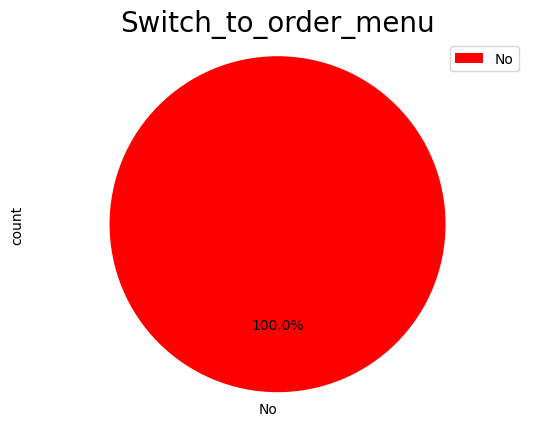

In [ ]:
#pie chart representing Switch_to_order_menu
df['Switch_to_order_menu'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90, colors=['red', 'blue'])
plt.title('Switch_to_order_menu',fontsize=20)
plt.axis('equal')
plt.legend(labels=df['Switch_to_order_menu'].value_counts().index,loc='upper right')
plt.show()


### From the above analysis 'currency', 'Is delivering now' and 'switch to order menu' are too skewed.Such columns are not correlated with the target variable because there is no information to gain

## **Selected Categorical Variables :** Has Table booking ,Has Online delivery

In [ ]:
#droping the columns 'currency', 'Is delivering now' and 'switch to order menu'
df.drop(columns=['Currency', 'Is_delivering_now','Switch_to_order_menu'], axis=1,inplace=True)
df.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Has_Table_booking,Has_Online_delivery,Price_range,Votes,Average_Cost_for_two,Rating,Cuisines_Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Yes,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Yes,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Yes,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Yes,No,4,229,1500,4.8,2


##**Visualize distrubution of all continious variables using Histogram**



array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Price_range'}>,
        <Axes: title={'center': 'Votes'}>],
       [<Axes: title={'center': 'Average_Cost_for_two'}>, <Axes: >]],
      dtype=object)

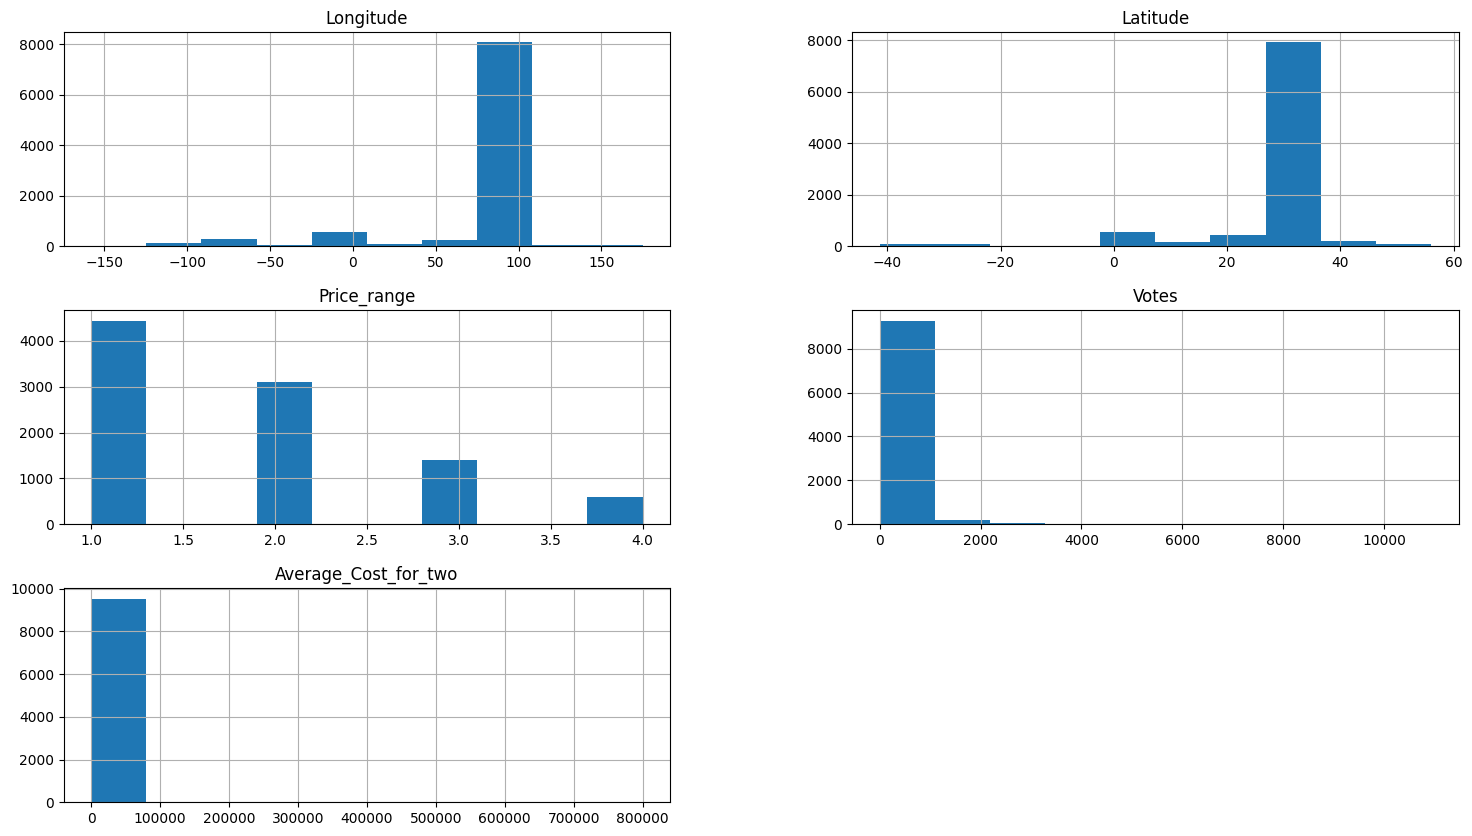

In [ ]:
df.hist(['Longitude','Latitude','Price_range','Votes','Average_Cost_for_two'],figsize=(18,10))

###**Distribution of Cuisines**

In [ ]:
import plotly.express as px
# Get the top 10 most popular cuisines
top_10_cuisines = df['Cuisines'].value_counts().nlargest(10)
# Create a DataFrame from the value counts
top_10_df = pd.DataFrame({'Cuisine': top_10_cuisines.index, 'Number of Restaurants': top_10_cuisines.values})
fig = px.bar(top_10_df, y='Cuisine', x='Number of Restaurants', orientation='h',
             title='Top 10 Most Popular Cuisines', labels={'Number of Restaurants': 'Number of Restaurants'})
fig.show()


###**Percentage of each cusine Type**

In [ ]:
# Extracting the top 10 most popular cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)
fig = px.pie(names=top_cuisines.index, values=top_cuisines.values,
             title='Top 10 Most Popular Cuisines',
             labels={'names': 'Cuisine'})
fig.show()

###**Restaurants in Each Price Range**

In [ ]:
price_range_counts = df['Price_range'].value_counts().reset_index()
price_range_counts.columns = ['Price_range', 'Count']
fig = px.bar(price_range_counts, x='Price_range', y='Count',
             title='Number of Restaurants in Each Price Range',
             labels={'Price_range': 'Price Range', 'Count': 'Number of Restaurants'})
fig.show()

### **PAIRPLOT OF DATA**

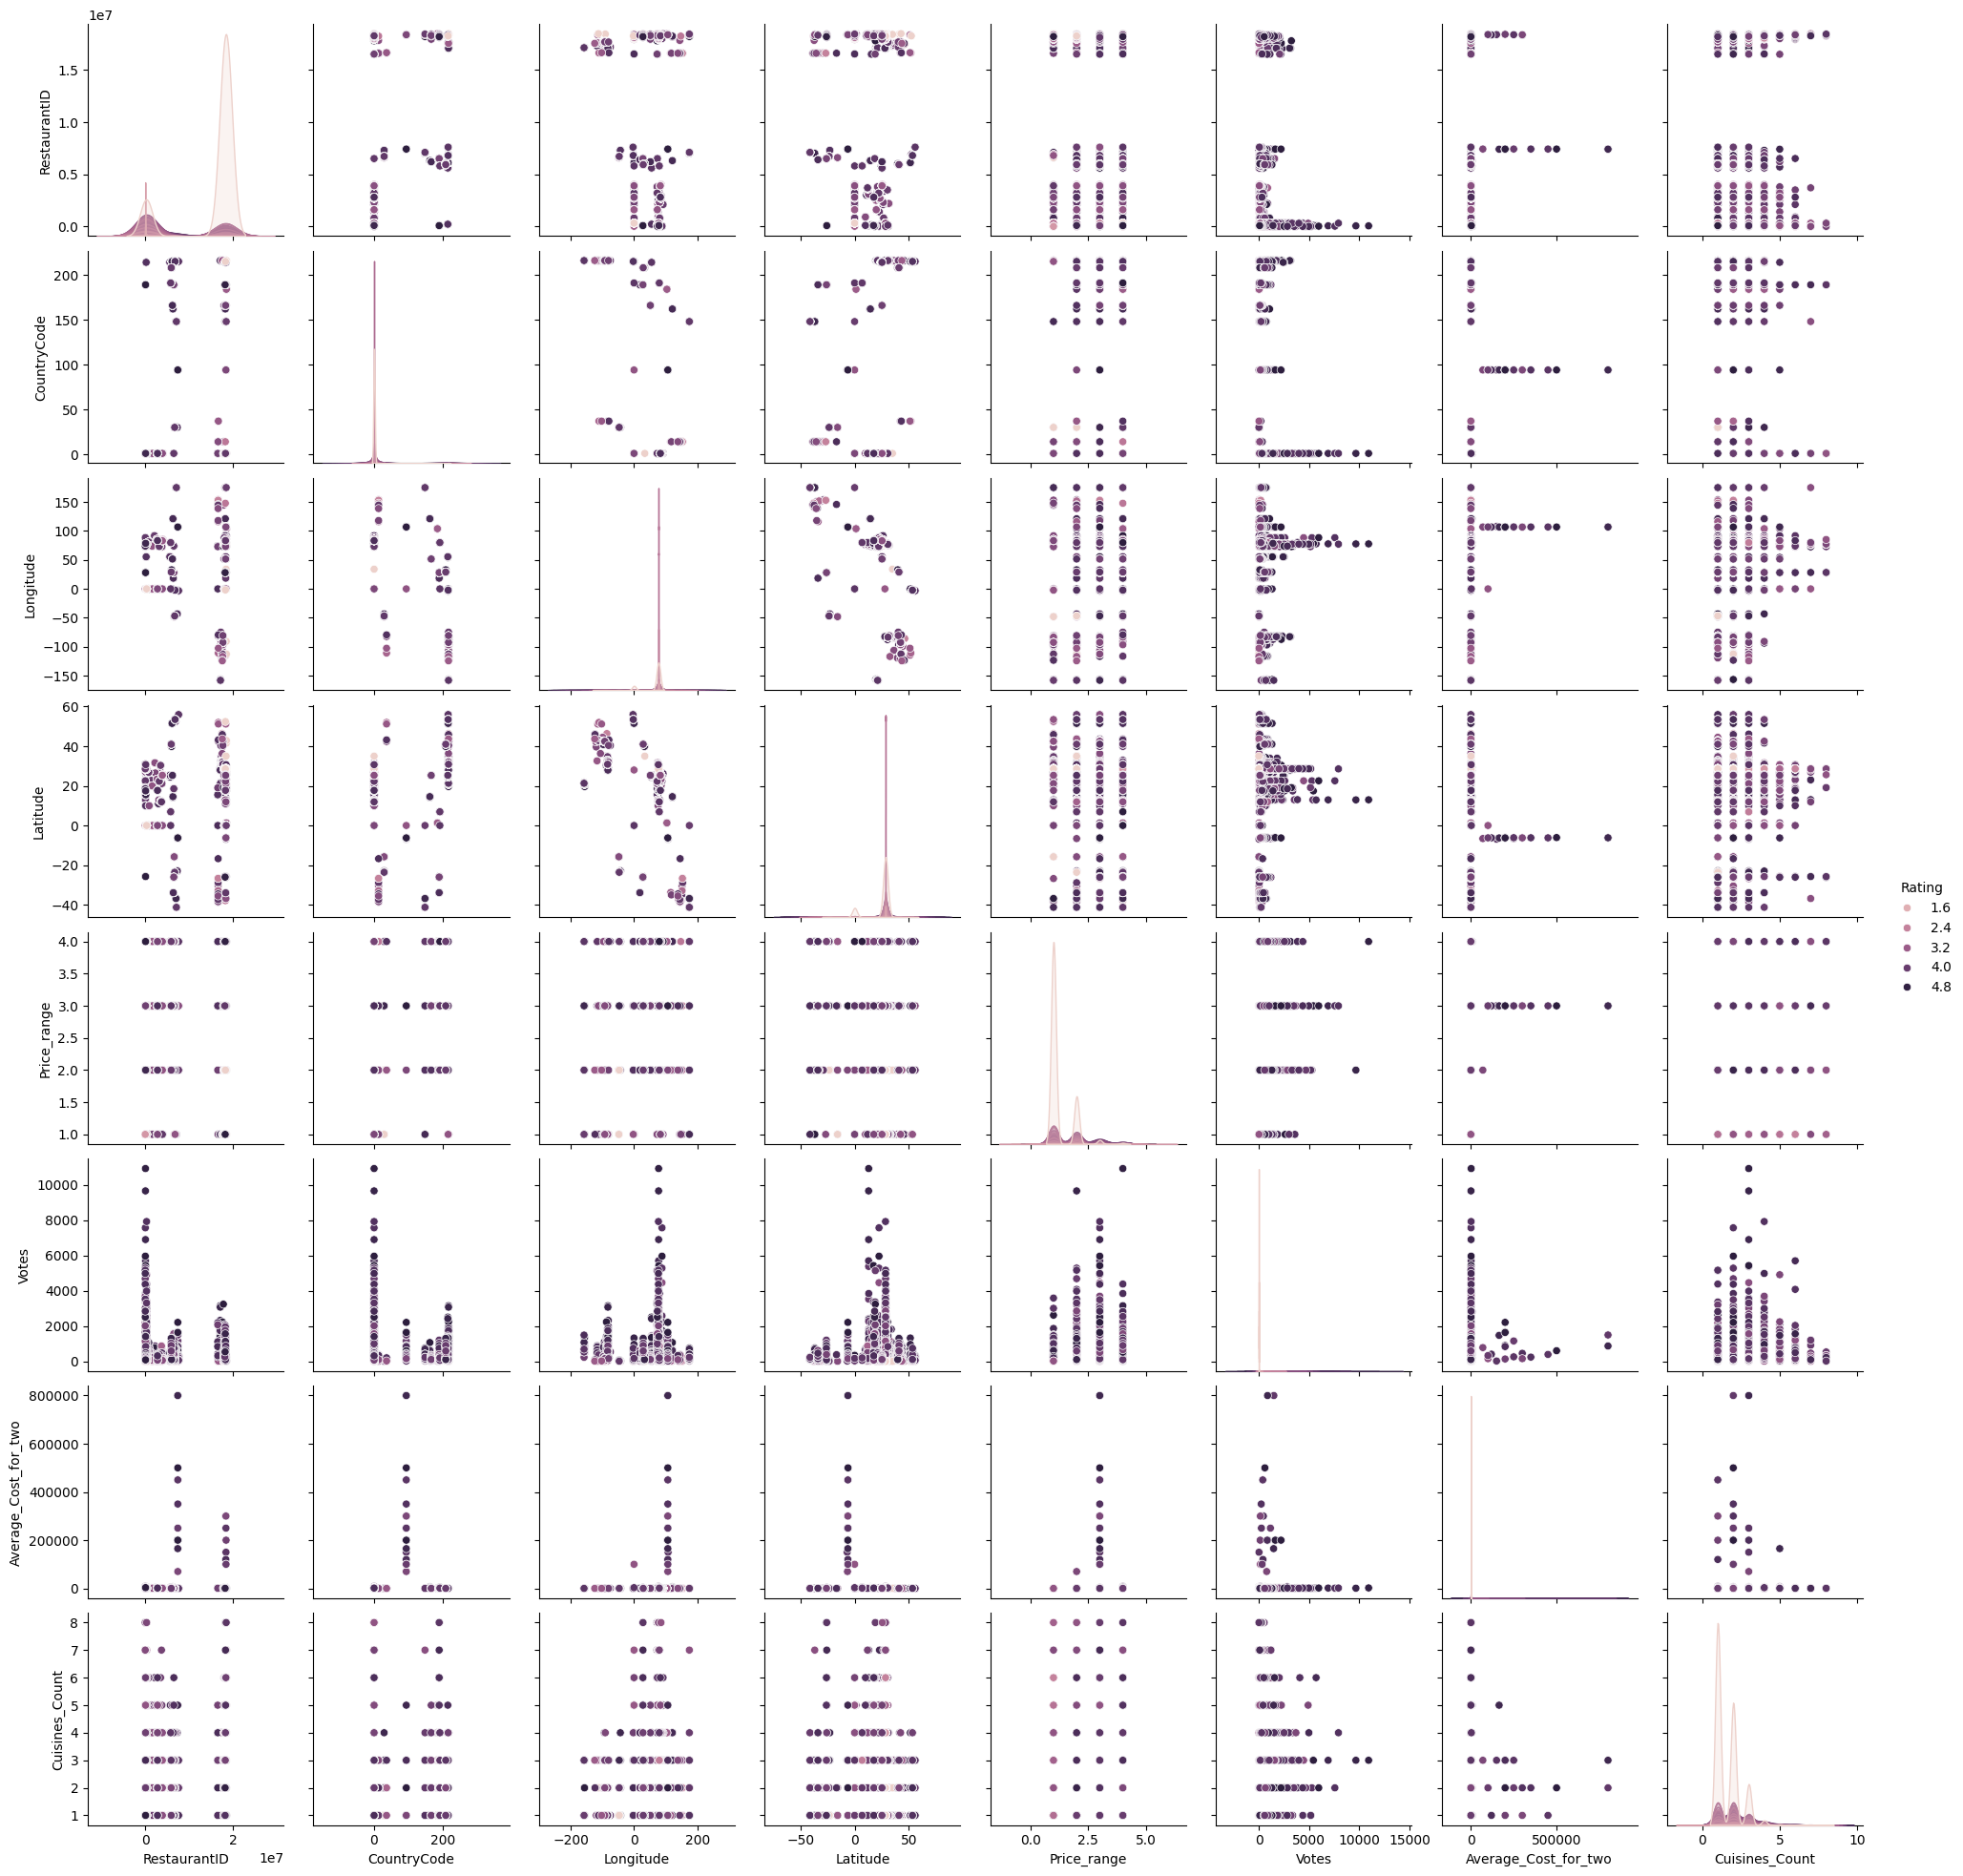

In [ ]:
sns.pairplot(df,hue='Rating')
plt.show()

In [ ]:
#scatter plot for votes vs rating using plotly

import plotly.express as px
votes_scatter = px.scatter(df, x="Votes", y="Rating", color="Rating", title='votes vs Rating')
votes_scatter.update_layout(title_x=0.5)
votes_scatter.show()

In [ ]:
import plotly.express as px
# Create scatter plot for average cost for two
scatter_plot = px.scatter(df, x='Average_Cost_for_two', y='Rating',title='Average Cost vs Rating',
                          labels={'Average_Cost_for_two':'Average Cost for Two', 'Rating':'Rating'})
scatter_plot.show()

## **Removing unwanted columns from the data**

In [ ]:
# deleting those columns which are not useful for our predictive analysis
rem_clms=['RestaurantID','RestaurantName','City','Address','Locality','LocalityVerbose','Cuisines','Latitude','Longitude']
df.drop(columns=rem_clms,axis=1,inplace=True)
df.head()


,CountryCode,Has_Table_booking,Has_Online_delivery,Price_range,Votes,Average_Cost_for_two,Rating,Cuisines_Count
0,162,Yes,No,3,314,1100,4.8,3
1,162,Yes,No,3,591,1200,4.5,1
2,162,Yes,No,4,270,4000,4.4,4
3,162,No,No,4,365,1500,4.9,2
4,162,Yes,No,4,229,1500,4.8,2


# **Selected Continious Variables:**

*   **Price Range**




*   **Longitude**

*   **Latitude**
*   **Votes:** selected , outliers are seen beyond 4000


*   **Average Cost For two:** Selected ,outliers senn beyond 300000



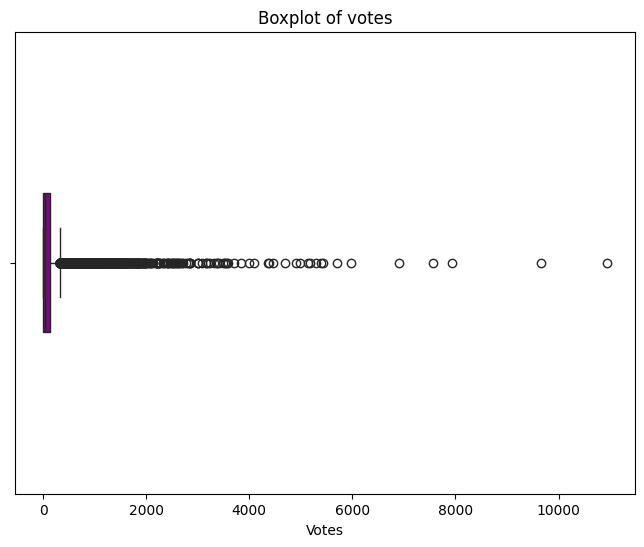

In [ ]:
#box plot of Votes
plt.figure(figsize=(8,6))
sns.boxplot(x='Votes',data=df,orient='h',width=0.3,color='purple')
plt.title('Boxplot of votes')
plt.show()

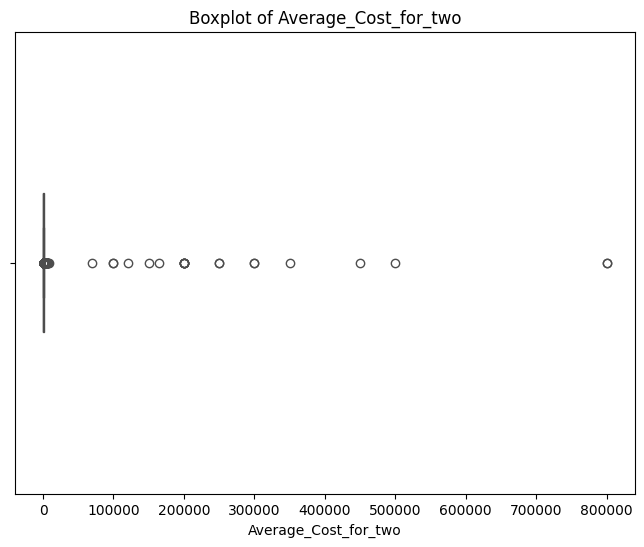

In [ ]:
#Box plot of Average_Cost_for_two
plt.figure(figsize=(8,6))
sns.boxplot(x='Average_Cost_for_two',data=df,orient='h',width=0.3,color='red')
plt.title('Boxplot of Average_Cost_for_two')
plt.show()

# **OUTLIER REMOVAL**

# Outliers are extreme values in data which are far away from the most of values

## =>Outlier removal is a critical step in data preprocessing, aimed at identifying and eliminating data points that deviate significantly from the rest of the dataset. By removing outliers, the integrity and accuracy of statistical analyses and machine learning models are enhanced, as outliers can distort patterns and skew results.

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]

# Removing outliers for the 'Votes' column
df = remove_outliers_iqr(df,'Votes')
# Removing outliers for the 'Average Cost For Two' column
df = remove_outliers_iqr(df,'Average_Cost_for_two')

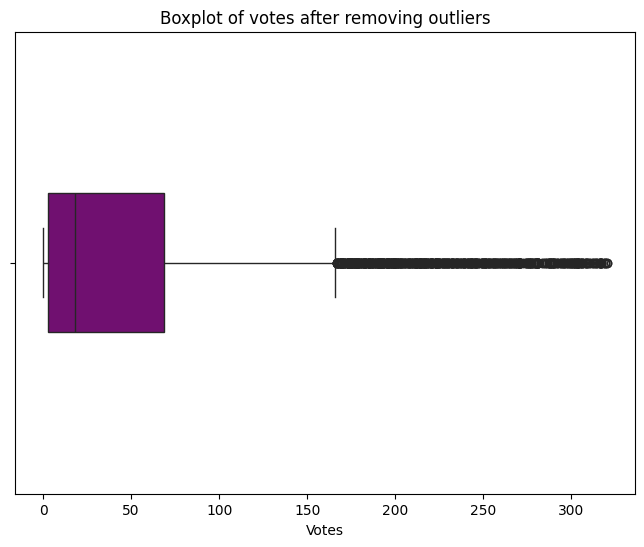

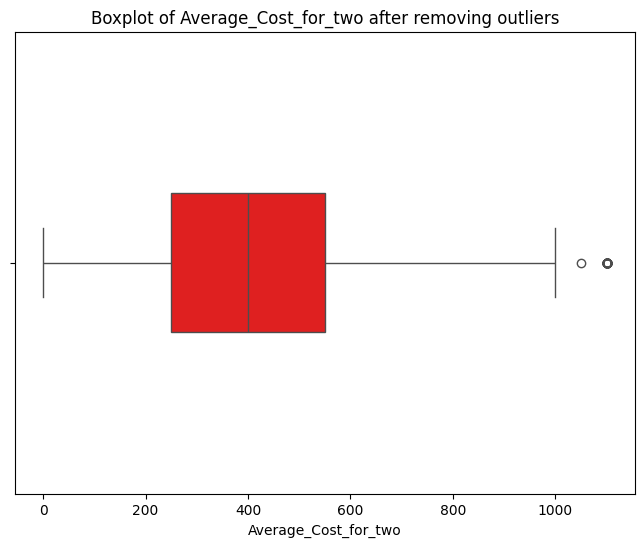

In [ ]:
# Box plot of Votes after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='Votes',data=df,orient='h',width=0.3,color='purple')
plt.title('Boxplot of votes after removing outliers')
plt.show()
#Box plot of Average_Cost_for_two after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='Average_Cost_for_two',data=df,orient='h',width=0.3,color='red')
plt.title('Boxplot of Average_Cost_for_two after removing outliers')
plt.show()


## **Checking and Filling the missing values**


In [ ]:
df.isna().sum()

CountryCode             0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
Cuisines_Count          0
dtype: int64

No missing values are found


##Calculating correlation matrix


In [ ]:
cont_clms=['Rating','Votes','Average_Cost_for_two']
corr=df[cont_clms].corr()
corr

,Rating,Votes,Average_Cost_for_two
Rating,1.000000,0.575399,0.184641
Votes,0.575399,1.000000,0.203534
Average_Cost_for_two,0.184641,0.203534,1.000000


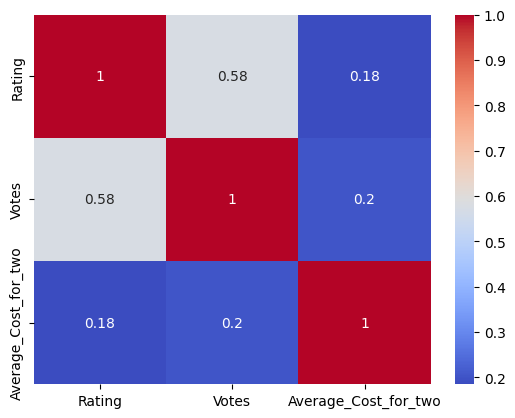

In [ ]:
#heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# **DATA PRE-PROCESSING**


### ENCODING ALL CATEGORICAL VALUES USING LABEL ENCODING

In [ ]:
df.head()

,CountryCode,Has_Table_booking,Has_Online_delivery,Price_range,Votes,Average_Cost_for_two,Rating,Cuisines_Count
0,162,Yes,No,3,314,1100,4.8,3
12,162,No,No,3,294,800,4.8,2
14,162,No,No,3,223,700,4.3,1
15,162,No,No,3,29,800,3.6,4
16,162,No,No,3,72,850,4.0,2


In [ ]:
# encode using label encoding the columns Has_Table_booking and Has_Online_delivery

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Has_Table_booking']=lab.fit_transform(df['Has_Table_booking'])
df['Has_Online_delivery']=lab.fit_transform(df['Has_Online_delivery'])
df.head()


,CountryCode,Has_Table_booking,Has_Online_delivery,Price_range,Votes,Average_Cost_for_two,Rating,Cuisines_Count
0,162,1,0,3,314,1100,4.8,3
12,162,0,0,3,294,800,4.8,2
14,162,0,0,3,223,700,4.3,1
15,162,0,0,3,29,800,3.6,4
16,162,0,0,3,72,850,4.0,2


In [ ]:
df.shape

(7747, 8)

In [ ]:
# cat_lst=['Has_Table_booking','Has_Online_delivery','Price_range']
# cont_clms=['Rating','Longitude','Latitude','Votes','Average_Cost_for_two']

In [ ]:
df.dtypes

CountryCode               int64
Has_Table_booking         int64
Has_Online_delivery       int64
Price_range               int64
Votes                     int64
Average_Cost_for_two      int64
Rating                  float64
Cuisines_Count            int64
dtype: object

# **FEATURE SELECTION**

###Feature selection is a critical process in machine learning that involves choosing the most relevant features from the dataset. It plays a vital role in improving model performance simplifying models, and enhancing interpretability. By selecting the most informative features, unnecessary noise and dimensionality are reduced, leading to more efficient and accurate predictions.

# **ANALYSIS OF VARIANCE (ANOVA) TEST**

###Anova feature selection, also known as analysis of variance, is a statistical method used to identify significant features in a dataset by evaluating their relationship with the target variable. It assesses the variance between groups and within groups to determine feature importance. Anova helps in selecting the most relevant features, thereby reducing dimensionality and improving model performance by focusing on the features that contribute the most to predicting the target variable.


In [ ]:
#split into x and y
x= df.drop('Rating', axis=1).values
y = df['Rating'].values

In [ ]:
#Creating dataframe
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
#finding best features for model using anova test
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=7)
x_selected=selector.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
selector.scores_

array([ 58.03093054,   3.12555597,  31.21592483,  50.80224096,
       175.06567697,  16.41572064,  13.60155029])

In [ ]:
#selected best 7 features
cols = selector.get_support(indices=True)
cols

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
#creating a seperate dataset with selected features
ndf=df.iloc[:,cols]
ndf


,CountryCode,Has_Table_booking,Has_Online_delivery,Price_range,Votes,Average_Cost_for_two,Rating
0,162,1,0,3,314,1100,4.8
12,162,0,0,3,294,800,4.8
14,162,0,0,3,223,700,4.3
15,162,0,0,3,29,800,3.6
16,162,0,0,3,72,850,4.0
...,...,...,...,...,...,...,...
9532,208,0,0,3,103,100,4.2
9533,208,0,0,2,103,50,4.3
9534,208,0,0,3,131,70,4.4
9535,208,0,0,3,152,70,4.2


In [ ]:
#reset the index of the new dataframe
ndf.reset_index(drop=True, inplace=True)
ndf

,CountryCode,Has_Table_booking,Has_Online_delivery,Price_range,Votes,Average_Cost_for_two,Rating
0,162,1,0,3,314,1100,4.8
1,162,0,0,3,294,800,4.8
2,162,0,0,3,223,700,4.3
3,162,0,0,3,29,800,3.6
4,162,0,0,3,72,850,4.0
...,...,...,...,...,...,...,...
7742,208,0,0,3,103,100,4.2
7743,208,0,0,2,103,50,4.3
7744,208,0,0,3,131,70,4.4
7745,208,0,0,3,152,70,4.2


In [ ]:
#separte x variable and y variable as output as Rating
x = ndf.drop('Rating',axis=1)
y = ndf['Rating']


In [ ]:
x

,CountryCode,Has_Table_booking,Has_Online_delivery,Price_range,Votes,Average_Cost_for_two
0,162,1,0,3,314,1100
1,162,0,0,3,294,800
2,162,0,0,3,223,700
3,162,0,0,3,29,800
4,162,0,0,3,72,850
...,...,...,...,...,...,...
7742,208,0,0,3,103,100
7743,208,0,0,2,103,50
7744,208,0,0,3,131,70
7745,208,0,0,3,152,70


In [ ]:
y

0       4.8
1       4.8
2       4.3
3       3.6
4       4.0
       ... 
7742    4.2
7743    4.3
7744    4.4
7745    4.2
7746    4.7
Name: Rating, Length: 7747, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=42)
print("Train Shape :",x_train.shape,"--------- Test Shape :",x_test.shape)

Train Shape : (5422, 6) --------- Test Shape : (2325, 6)


## **Normalization of Data**



In [ ]:
#standardization of data  ,Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **MODEL CREATION**

### USING ALGORITHMS:
1.   LINEAR REGRESSOR
2.   DECISION TREE REGRESSOR
3.   RANDOM FOREST REGRESSOR
4.   ADABOOST REGRESSOR
5.  K-NEIGHBORS REGRESSOR




### **MODELLING WITH LINEAR REGRESSOR**


In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred1 = model_1.predict(x_test)
y_pred1

array([2.62571585, 2.32738766, 2.07839891, ..., 2.48472232, 2.04989914,
       3.39945025])

### **MODELLING WITH DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(criterion='squared_error')
model_2.fit(x_train,y_train)
y_pred2 = model_2.predict(x_test)
y_pred2

array([3.4, 1. , 1. , ..., 2.8, 1. , 3.9])

### **MODELLING WITH RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(n_estimators=101, random_state=42)
model_3.fit(x_train, y_train)
y_pred3 = model_3.predict(x_test)
y_pred3

array([3.03927393, 1.        , 1.        , ..., 2.9460396 , 1.        ,
       3.88613861])

### **MODELLING WITH ADABOOST REGRESSOR**


In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# model_4 = AdaBoostRegressor(n_estimators=101, random_state=42)
# model_4.fit(x_train, y_train)
# y_pred4 = model_4.predict(x_test)
# y_pred4

array([3.20436047, 1.        , 1.        , ..., 3.15591794, 1.        ,
       3.22272831])

### **MODELLING WITH KNEIGHBORS REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_5 = KNeighborsRegressor(n_neighbors=3)
model_5.fit(x_train, y_train)
y_pred5 = model_5.predict(x_test)
y_pred5

array([3.53333333, 1.        , 1.        , ..., 3.13333333, 1.        ,
       4.1       ])

In [ ]:
model=('LINEAER REGRESSION','DECISION TREE REGRESSOR','RANDOM FOREST REGRESSOR','KNN')
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,KNeighborsRegressor]
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
r2_list=[]

In [ ]:
for i in models:
  print("Model Name is ",i)
  print('*'*50)
  mod=i().fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  r2=r2_score(y_test, y_pred)
  r2_list.append(r2)
  print("R2 score:", r2_score(y_test, y_pred))
  print("MAE score:", mean_absolute_error(y_test, y_pred))
  print("MSE score:", mean_squared_error(y_test, y_pred))
  print("MAPE score:", mean_absolute_percentage_error(y_test, y_pred))
  print("="*50)

Model Name is  <class 'sklearn.linear_model._base.LinearRegression'>
**************************************************
R2 score: 0.38172117739950606
MAE score: 0.7753907896814731
MSE score: 0.7563489106938582
MAPE score: 0.45042890227581156
Model Name is  <class 'sklearn.tree._classes.DecisionTreeRegressor'>
**************************************************
R2 score: 0.8644582264445309
MAE score: 0.25159351958047477
MSE score: 0.16581009899547347
MAPE score: 0.07866007787973027
Model Name is  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
**************************************************
R2 score: 0.9033003629171177
MAE score: 0.2157639064710783
MSE score: 0.11829398403863593
MAPE score: 0.06826750281008272
Model Name is  <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
**************************************************
R2 score: 0.8825842387608684
MAE score: 0.23566451612903225
MSE score: 0.1436363010752688
MAPE score: 0.08080482857589083


In [ ]:
r2_list

[0.38172117739950606,
 0.8644582264445309,
 0.9033003629171177,
 0.8825842387608684]

In [ ]:
best_model = pd.DataFrame({"model": model, "R2 score": r2_list})
fine_model = best_model.sort_values(by="R2 score",ascending=False)
fine_model.style.background_gradient(cmap='Set3')

,model,R2 score
2,RANDOM FOREST REGRESSOR,0.903300
3,KNN,0.882584
1,DECISION TREE REGRESSOR,0.864458
0,LINEAER REGRESSION,0.381721


<ipython-input-212-d8a121535379>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




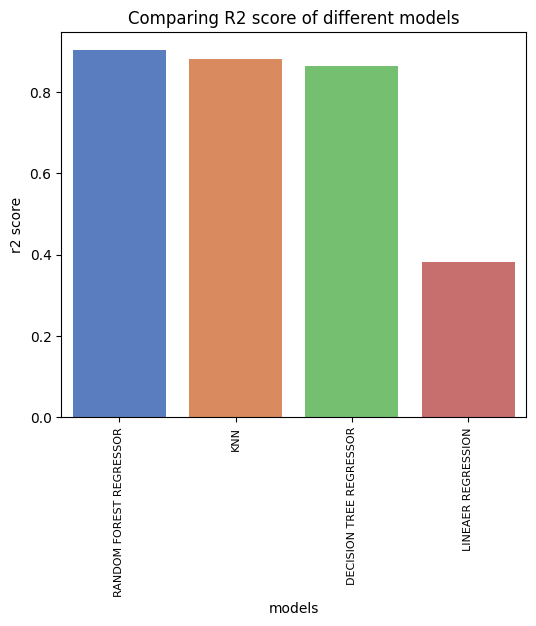

In [ ]:
#comparing r2 score diagram
plt.figure(figsize=(6,5))
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x=fine_model['model'], y=fine_model['R2 score'], data=fine_model, palette='muted')
plt.xlabel("models")
plt.ylabel("r2 score")
plt.title("Comparing R2 score of different models")
plt.show()

## **Best model cross validation**(RandomForestRegressor)



In [ ]:
#cross validation for random forest regressor
from sklearn.model_selection import cross_val_score
model_3 = RandomForestRegressor(n_estimators=101, random_state=42)
scores = cross_val_score(model_3, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.82324984 0.88233195 0.90954159 0.90002648 0.89981404]
Average cross-validation score: 0.8829927811614198


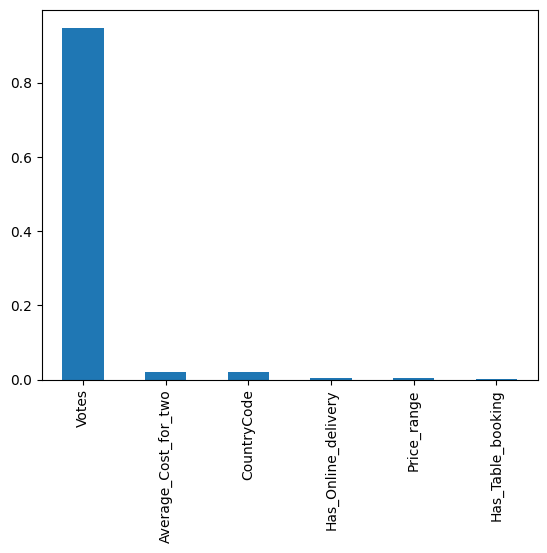

In [ ]:
# feature importance of random forest regressor
from sklearn.ensemble import RandomForestRegressor
model_3=RandomForestRegressor()
model_3.fit(x,y)
importances = model_3.feature_importances_
features = ndf.columns[:-1]
feat_imp = pd.Series(importances,features).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.show()


# **The RandomForestRegressor stands out as the top-performing model, achieving the highest r2 score.**

In [ ]:
import pickle
pickle.dump(model_3,open('randommodel.sav','wb'))

In [ ]:
pickle.dump(scaler,open('minmax.sav','wb'))

In [ ]:
y_new = model_3.predict(scaler.transform([[162,1,0,3,314,1100]]))
print(y_new)

[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

